In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape, test.shape

((891, 12), (418, 11))

## Data Preprocessing on Train data

Removing columns that we don't need

In [5]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

Checking for null values

In [6]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We have null values in two columns. Let's take care of this problem.

Let's fill the null values of age columns with the mean values

In [7]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

Now we have to take care of null values of Embarked column.

Let's first check which embarkation port we have most in our dataset.

In [8]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

`Southampton` is the top port of embarkation. So, let's fill the null values with `S`

In [9]:
train['Embarked'].fillna('S', inplace = True)

Let's check again for null values.

In [10]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Nice!**

We don't any null values now

# Data Exploration on Train set

Let's first check how many people survived

In [11]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

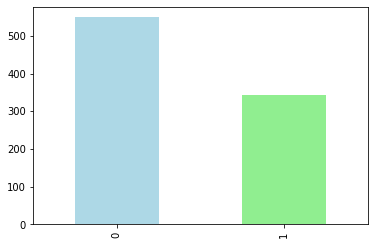

In [12]:
train.Survived.value_counts().plot(kind = 'bar', color = ['lightblue', 'lightgreen']);

Let's check how many male and female was there

In [13]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

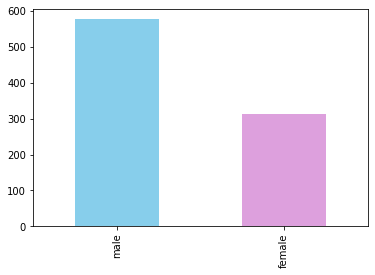

In [14]:
train.Sex.value_counts().plot(kind = 'bar', color = ['skyblue', 'plum']);

let's check out survivors w.r.t sex

In [15]:
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


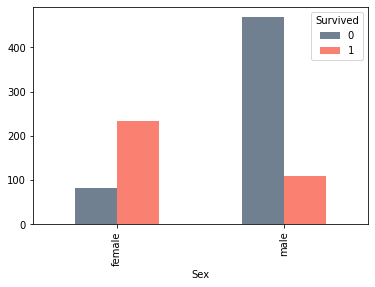

In [16]:
pd.crosstab(train.Sex, train.Survived).plot(kind = 'bar', color = ['slategray', 'salmon']);

Survivors w.r.t pclass

In [17]:
pd.crosstab(train.Pclass, train.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


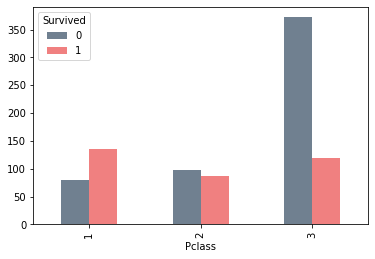

In [18]:
pd.crosstab(train.Pclass, train.Survived).plot(kind = 'bar', color = ['slategray', 'lightcoral']);

Let's check the Port of Embarkation

In [19]:
train.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

Let's look at our age column

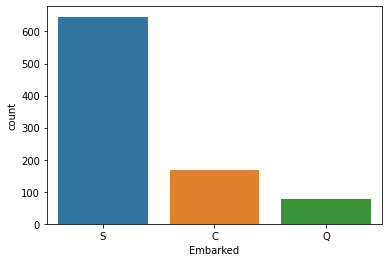

In [20]:
sns.countplot(x = 'Embarked', data = train);

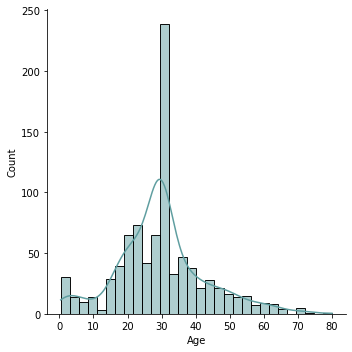

In [21]:
sns.displot(x = 'Age', data = train, color = 'cadetblue', kde = True);

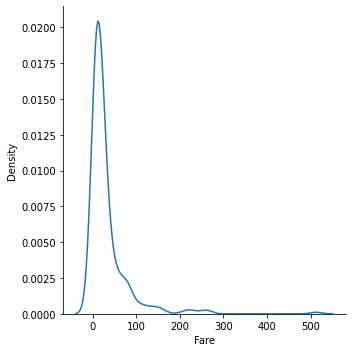

In [22]:
sns.displot(x = 'Fare', data = train, kind = 'kde');

Let's now find a relation among age, survived and pclass columns

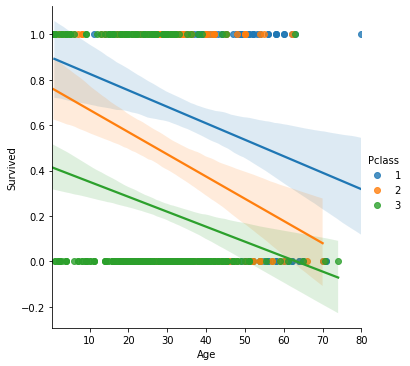

In [23]:
sns.lmplot(x = 'Age', y = 'Survived', hue = 'Pclass', data = train);

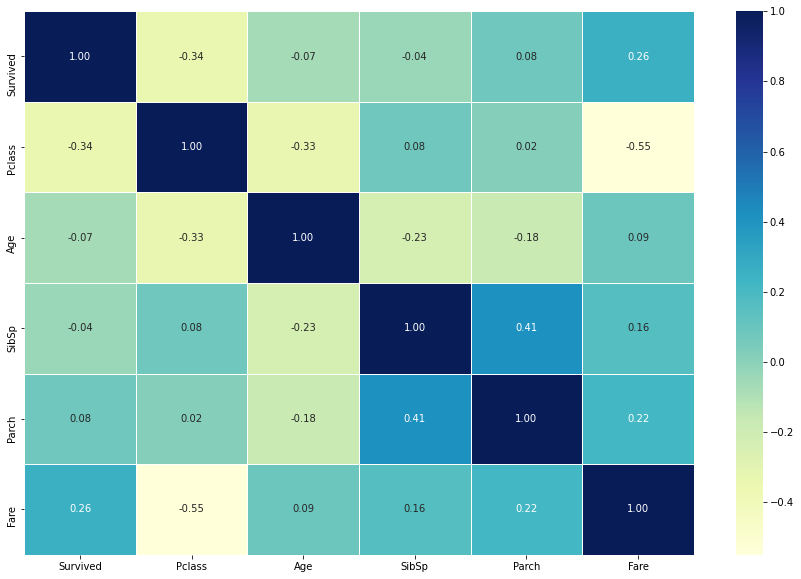

In [24]:
correlation_matrix = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

# Feature Engineering in train data

In [25]:
train['family'] = train['SibSp'] + train['Parch']

In [26]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
5,0,3,male,29.699118,0,0,8.4583,Q,0
6,0,1,male,54.000000,0,0,51.8625,S,0
7,0,3,male,2.000000,3,1,21.0750,S,4
8,1,3,female,27.000000,0,2,11.1333,S,2
9,1,2,female,14.000000,1,0,30.0708,C,1


Removing skewness in `Age` column

In [27]:
train['Age']=np.log(train['Age']+1)

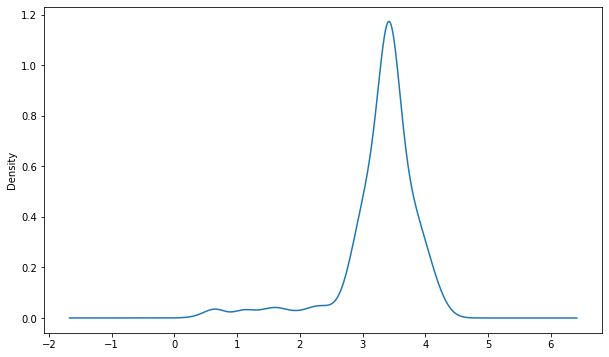

In [28]:
train['Age'].plot(kind = 'density', figsize=(10, 6));

Removing skewness in `Fare` column

In [29]:
train['Fare']=np.log(train['Fare']+1)

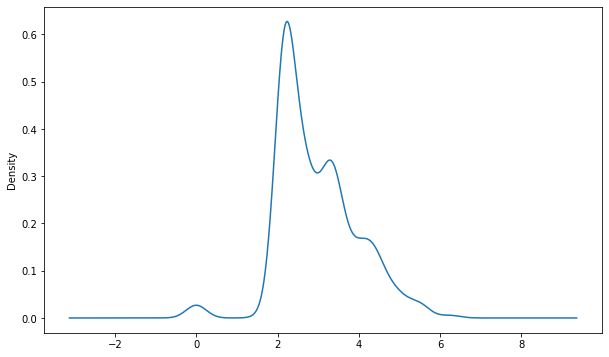

In [30]:
 train['Fare'].plot(kind = 'density', figsize=(10, 6));

In [31]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,3.135494,1,0,2.110213,S,1
1,1,1,female,3.663562,1,0,4.280593,C,1
2,1,3,female,3.295837,0,0,2.188856,S,0
3,1,1,female,3.583519,1,0,3.990834,S,1
4,0,3,male,3.583519,0,0,2.202765,S,0
5,0,3,male,3.424234,0,0,2.246893,Q,0
6,0,1,male,4.007333,0,0,3.967694,S,0
7,0,3,male,1.098612,3,1,3.094446,S,4
8,1,3,female,3.332205,0,2,2.495954,S,2
9,1,2,female,2.708050,1,0,3.436268,C,1


Let's create x and y matrix of features

In [32]:
x = train.drop('Survived',  axis = 1)
y = train['Survived']

In [33]:
x.shape

(891, 8)

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,3,male,3.135494,1,0,2.110213,S,1
1,1,female,3.663562,1,0,4.280593,C,1
2,3,female,3.295837,0,0,2.188856,S,0
3,1,female,3.583519,1,0,3.990834,S,1
4,3,male,3.583519,0,0,2.202765,S,0


We have two `categorical` columns. Let's take care of them now.

In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Sex', 'Embarked', 'Pclass']
onehotencode = OneHotEncoder()

transformer = ColumnTransformer([('Encoder', onehotencode, categorical_features)], remainder = 'passthrough')

encoded = transformer.fit_transform(x)

In [36]:
encoded_df = pd.DataFrame(encoded)

In [37]:
encoded_df.shape

(891, 13)

In [38]:
encoded_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.135494,1.0,0.0,2.110213,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3.663562,1.0,0.0,4.280593,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.295837,0.0,0.0,2.188856,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.583519,1.0,0.0,3.990834,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.583519,0.0,0.0,2.202765,0.0


**Avoiding Dummy variables**

In [39]:
encoded_x = encoded_df.drop([0, 2, 5], axis = 1)

In [40]:
encoded_x.head()

,1,3,4,6,7,8,9,10,11,12
0,1.0,0.0,1.0,0.0,1.0,3.135494,1.0,0.0,2.110213,1.0
1,0.0,0.0,0.0,0.0,0.0,3.663562,1.0,0.0,4.280593,1.0
2,0.0,0.0,1.0,0.0,1.0,3.295837,0.0,0.0,2.188856,0.0
3,0.0,0.0,1.0,0.0,0.0,3.583519,1.0,0.0,3.990834,1.0
4,1.0,0.0,1.0,0.0,1.0,3.583519,0.0,0.0,2.202765,0.0


In [41]:
encoded_x.shape

(891, 10)

In [42]:
y.shape

(891,)

# Feature Engineering in test data

In [43]:
test['family'] = test['SibSp'] + test['Parch']

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


Removing skewness in `Age` column

In [45]:
test['Age']=np.log(test['Age']+1)

Removing skewness in `Fare` column

In [46]:
test['Fare']=np.log(test['Fare']+1)

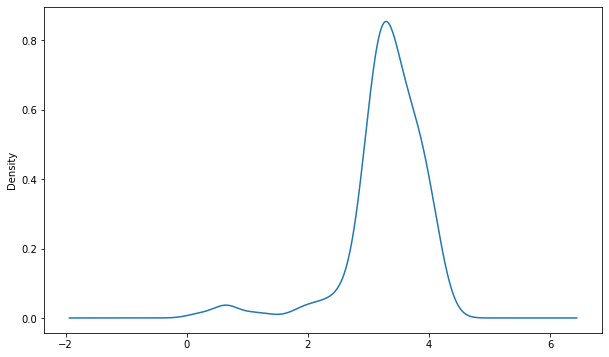

In [47]:
test['Age'].plot(kind = 'density', figsize=(10, 6));

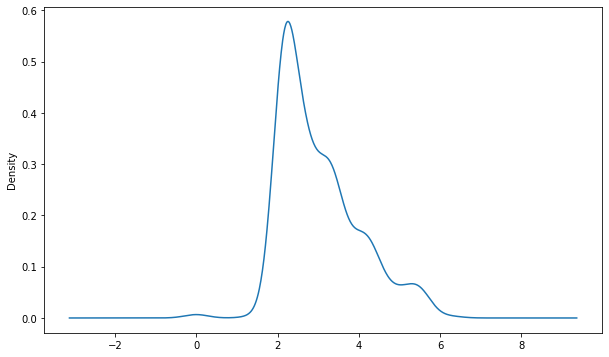

In [48]:
test['Fare'].plot(kind = 'density', figsize=(10, 6));

In [49]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,892,3,"Kelly, Mr. James",male,3.569533,0,0,330911,2.178064,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,3.871201,1,0,363272,2.079442,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,4.143135,0,0,240276,2.369075,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,3.332205,0,0,315154,2.268252,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3.135494,1,1,3101298,2.586824,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,2.708050,0,0,7538,2.324836,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,3.433987,0,0,330972,2.155152,NaN,Q,0
7,899,2,"Caldwell, Mr. Albert Francis",male,3.295837,1,1,248738,3.401197,NaN,S,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,2.944439,0,0,2657,2.107689,NaN,C,0
9,901,3,"Davies, Mr. John Samuel",male,3.091042,2,0,A/4 48871,3.224858,NaN,S,2


# Preparing test set

In [50]:
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [51]:
test.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,3,male,3.569533,0,0,2.178064,Q,0
1,3,female,3.871201,1,0,2.079442,S,1
2,2,male,4.143135,0,0,2.369075,Q,0
3,3,male,3.332205,0,0,2.268252,S,0
4,3,female,3.135494,1,1,2.586824,S,2
5,3,male,2.708050,0,0,2.324836,S,0
6,3,female,3.433987,0,0,2.155152,Q,0
7,2,male,3.295837,1,1,3.401197,S,2
8,3,female,2.944439,0,0,2.107689,C,0
9,3,male,3.091042,2,0,3.224858,S,2


Checking for null values

In [52]:
test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
family       0
dtype: int64

In [53]:
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace = True)

In [54]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
family      0
dtype: int64

We succesfully removed all the null values

As before we now have to take care of `categorical columns`

In [55]:
categorical_features = ['Sex', 'Embarked', 'Pclass']
onehotencode = OneHotEncoder()

transformer = ColumnTransformer([('Encoder', onehotencode, categorical_features)], remainder = 'passthrough')

encoded_test = transformer.fit_transform(test)

In [56]:
encoded_test = pd.DataFrame(encoded_test)

In [57]:
encoded_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.569533,0.0,0.0,2.178064,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.871201,1.0,0.0,2.079442,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4.143135,0.0,0.0,2.369075,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3.332205,0.0,0.0,2.268252,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.135494,1.0,1.0,2.586824,2.0


Avoiding dummy variable trap

In [58]:
encoded_test_x = encoded_test.drop([0, 2, 5], axis = 1)

In [59]:
encoded_test_x.head()

,1,3,4,6,7,8,9,10,11,12
0,1.0,1.0,0.0,0.0,1.0,3.569533,0.0,0.0,2.178064,0.0
1,0.0,0.0,1.0,0.0,1.0,3.871201,1.0,0.0,2.079442,1.0
2,1.0,1.0,0.0,1.0,0.0,4.143135,0.0,0.0,2.369075,0.0
3,1.0,0.0,1.0,0.0,1.0,3.332205,0.0,0.0,2.268252,0.0
4,0.0,0.0,1.0,0.0,1.0,3.135494,1.0,1.0,2.586824,2.0


In [60]:
encoded_test_x.shape

(418, 10)

# Modeling

Let's split our dataset

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(encoded_x,y,random_state = 31)

In [62]:
len(x_train), len(x_test), len(y_train), len(y_test)

(668, 223, 668, 223)

In [63]:
x_train.shape

(668, 10)

In [64]:
y_train.shape

(668,)

# Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(max_iter = 1000, random_state = 4)
log_clf.fit(x_train, y_train)
log_score = log_clf.score(x_test, y_test)
log_score

0.8161434977578476

### Logistic Regression Hyperparameter Tuning

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [67]:
log_grid = {'C': np.logspace(-4, 4),
            'solver': ['liblinear'],
            'max_iter': np.arange(100, 2000, 100),
            'penalty':['l1', 'l2']
           }

log_gscv = GridSearchCV(LogisticRegression(max_iter = 1000, random_state = 7),
                          param_grid=log_grid,
                          cv=5,
                          verbose=True)

log_gscv.fit(x_train, y_train)
log_tuned_score = log_gscv.score(x_test, y_test)
log_tuned_score

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


0.8071748878923767

In [68]:
log_gscv.best_params_

{'C': 1.2067926406393288,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

### Evaluating logistic regression model

In [69]:
from sklearn.metrics import classification_report
y_preds = log_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       131
           1       0.82      0.71      0.76        92

    accuracy                           0.82       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



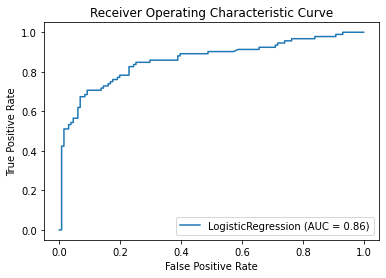

In [70]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# Linear SVC

In [71]:
from sklearn import svm
svc_clf = svm.SVC(random_state = 7)
svc_clf.fit(x_train, y_train)
svc_score = svc_clf.score(x_test, y_test)
svc_score

0.8340807174887892

### SVC Hyperparameter tuning

In [72]:
svc_grid = {'C': np.logspace(-5, 5, 20),
            'kernel': ['rbf'],
            'degree': [2,3,4]
           }

svc_gscv = GridSearchCV(svm.SVC(random_state = 31),
                        param_grid=svc_grid,
                        cv=5,
                        verbose=True)

svc_gscv.fit(x_train, y_train)
svc_tuned_score = log_gscv.score(x_test, y_test)
svc_tuned_score

Fitting 5 folds for each of 60 candidates, totalling 300 fits


0.8071748878923767

In [73]:
svc_gscv.best_params_

{'C': 0.5455594781168515, 'degree': 2, 'kernel': 'rbf'}

### Evaluating with SVC 

In [74]:
y_preds = svc_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.86      0.72      0.78        92

    accuracy                           0.83       223
   macro avg       0.84      0.82      0.82       223
weighted avg       0.84      0.83      0.83       223



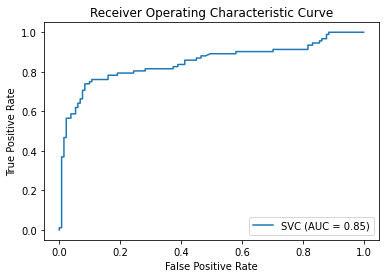

In [75]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# KNeighbors Classifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
knn_score = knn_clf.score(x_test, y_test)
knn_score

0.7892376681614349

### KNeighbors Classifier Hyperparameter Tuning

In [77]:
knn_grid = {'n_neighbors': np.arange(2, 15),
            'leaf_size': [10, 15, 20, 25, 30, 35, 40, 45, 50],
            'p':[1,2,3,4,5], 
            'algorithm': ['auto', 'ball_tree', 'kd_tree']}

knn_gscv = GridSearchCV(KNeighborsClassifier(),
                        param_grid=knn_grid,
                        cv=5,
                        verbose=True)

knn_gscv.fit(x_train, y_train)
knn_tuned_score = knn_gscv.score(x_test, y_test)
knn_tuned_score

Fitting 5 folds for each of 1755 candidates, totalling 8775 fits


0.7713004484304933

In [78]:
knn_gscv.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'p': 4}

### Evaluating KNN model

In [79]:
y_preds = knn_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       131
           1       0.78      0.67      0.73        92

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



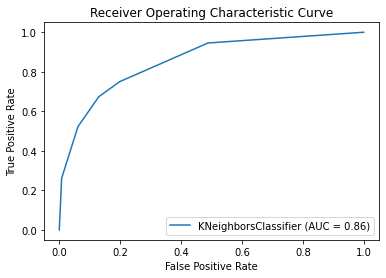

In [80]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(n_estimators=1000, random_state = 35)
rand_clf.fit(x_train, y_train)
ranf_score = rand_clf.score(x_test, y_test)
ranf_score

0.8071748878923767

### Random Forest hyperparameter tuning

In [82]:
rfcv_grid = {"n_estimators": np.arange(500, 2000, 100),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rfcv_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rfcv_grid,
                           cv=5,
                           n_iter = 100,
                           verbose=True)

rfcv_clf.fit(x_train, y_train)
ranf_tuned_score = rfcv_clf.score(x_test, y_test)
ranf_tuned_score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


0.8116591928251121

In [83]:
rfcv_clf.best_params_

{'n_estimators': 1100,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 10}

### Evaluating Random Forest model

In [84]:
y_preds = rfcv_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       131
           1       0.85      0.66      0.74        92

    accuracy                           0.81       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.81      0.81       223



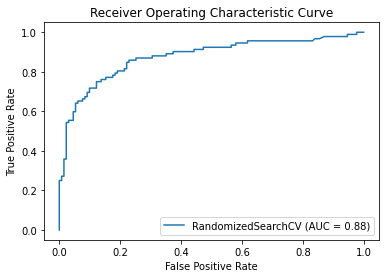

In [85]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfcv_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# GradientBoostingClassifier

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
gbc_score = gbc.score(x_test, y_test)
gbc_score

0.8385650224215246

### GradientBoostingClassifier hyperparameter tuning

In [87]:
gbc_grid = {'loss': ['deviance', 'exponential'],
            'learning_rate': [0.1,0.01],
            'n_estimators': [100, 200, 500, 1000],
            'min_samples_split': [2, 4, 6, 8, 10],
            'min_samples_leaf': [1, 2, 3, 5],
            'max_depth': [1, 2, 3]}


gbc_clf = GridSearchCV(GradientBoostingClassifier(),
                      param_grid = gbc_grid,
                           cv=5,
                           verbose=True)
gbc_clf.fit(x_train, y_train)
gbc_tuned_score = gbc_clf.score(x_test, y_test)
gbc_tuned_score

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


0.8295964125560538

In [88]:
gbc_clf.best_params_

{'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

### Evaluating gradient boosting model

In [89]:
y_preds = gbc.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       131
           1       0.87      0.72      0.79        92

    accuracy                           0.84       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



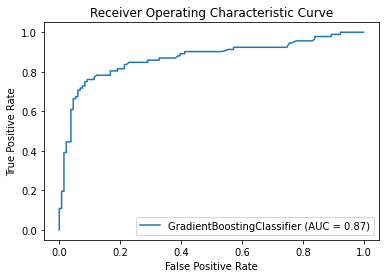

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gbc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# CatBoost

In [91]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier(random_seed = 31)
cbc.fit(x_train, y_train, verbose=False);
cbc_score = cbc.score(x_test, y_test);
cbc_score

0.8295964125560538

### CatBoostClassifier hyperparameter tuning

In [92]:
cbc_grid = {'iterations':[10, 100, 200, 500, 1000],
            'learning_rate': [0.1, 0.01]}


cbc_clf = GridSearchCV(CatBoostClassifier(random_state = 31),
                      param_grid = cbc_grid,
                           cv=5,
                           verbose=True)

cbc_clf.fit(x_train, y_train, verbose=False)
cbc_tuned_score = cbc_clf.score(x_test, y_test)
cbc_tuned_score

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.8340807174887892

In [93]:
cbc_clf.best_params_

{'iterations': 200, 'learning_rate': 0.01}

### Evaluating CatBoost model

In [94]:
y_preds = cbc_clf.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87       131
           1       0.91      0.66      0.77        92

    accuracy                           0.83       223
   macro avg       0.86      0.81      0.82       223
weighted avg       0.85      0.83      0.83       223



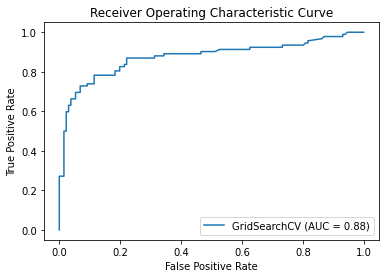

In [95]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(cbc_clf, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

# LGBM

In [96]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm_score = lgbm.score(x_test, y_test)
lgbm_score

0.820627802690583

### LGBM hyperparameter tuning

In [97]:
lgbm_grid = {'num_leaves': [10, 15, 30, 31, 40, 45],
             'n_estimators':[10, 50, 100, 200],
             'learning_rate': [0.1, 0.01],
             'min_child_samples': [5, 10, 15, 20, 25]}


lgbm_clf = GridSearchCV(LGBMClassifier(random_state = 31),
                           param_grid = lgbm_grid,
                           cv=5,
                           verbose=True)

lgbm_clf.fit(x_train, y_train, verbose=False)
lgbm_tuned_score = lgbm_clf.score(x_test, y_test)
lgbm_tuned_score

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


0.8071748878923767

In [98]:
lgbm_clf.best_params_

{'learning_rate': 0.1,
 'min_child_samples': 5,
 'n_estimators': 10,
 'num_leaves': 15}

### Evaluating LGBM model

In [99]:
y_preds = lgbm.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       131
           1       0.82      0.72      0.77        92

    accuracy                           0.82       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223



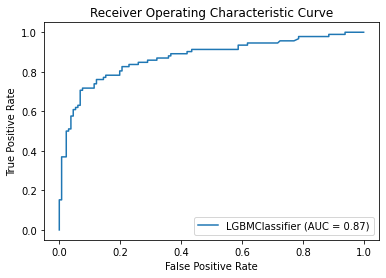

In [100]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lgbm, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

Let's make a dictionary of all models and accuracy

In [101]:
score = [{'Model':'Logistic Regression', 'Score': log_score, 'Tuned_score': log_tuned_score}, 
         {'Model':'SVC', 'Score': svc_score, 'Tuned_score': svc_tuned_score},
         {'Model':'KNN', 'Score': knn_score, 'Tuned_score': knn_tuned_score},
         {'Model':'Random Forest', 'Score': ranf_score, 'Tuned_score': ranf_tuned_score},
         {'Model':'Gradient Boosting', 'Score': gbc_score, 'Tuned_score': gbc_tuned_score},
         {'Model':'CatBoost', 'Score': cbc_score, 'Tuned_score': cbc_tuned_score},
         {'Model':'LGBM', 'Score': lgbm_score, 'Tuned_score': lgbm_tuned_score}]

Let's view all model score as a dataframe to get a good overview

In [102]:
pd.DataFrame(score, columns=['Model','Score','Tuned_score'])

,Model,Score,Tuned_score
0,Logistic Regression,0.816143,0.807175
1,SVC,0.834081,0.807175
2,KNN,0.789238,0.771300
3,Random Forest,0.807175,0.811659
4,Gradient Boosting,0.838565,0.829596
5,CatBoost,0.829596,0.834081
6,LGBM,0.820628,0.807175


**Looks like SVC classifier is doing best. So, let's predict with this**.

In [103]:
final_preds = svc_clf.predict(encoded_test_x)

# Creating file for submission 

In [104]:
sub_data = pd.read_csv('../input/titanic/gender_submission.csv')
final_data = {'PassengerId': sub_data.PassengerId, 'Survived': final_preds}
final_submission = pd.DataFrame(data=final_data)
final_submission.to_csv('submission_file_titanic.csv',index =False)

**`If this notebook was useful to you. Don't forget to upvote. Thanks`**